사이킷런에서 Iris 데이터셋을 불러옵니다. 3번째 열은 꽃잎의 길이이고 4번째 열은 꽃잎의 너비입니다.  
0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica 입니다.

In [1]:
%run setup.py

In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print("클래스 레이블: {}".format(np.unique(y)))

클래스 레이블: [0 1 2]


80%는 훈련 데이터 20%는 테스트 데이터로 분할합니다:

train_test_split 함수:

- 데이터셋을 미리 섞음  
- random_state를 고정하면 실행결과를 재현할 수 있음  
- `stratify`인수를 이용하여 계층화를 진행

bincount 함수를 사용하여 배열에 있는 고유한 값을 알 수 있습니다.

> stratify 

데이터셋이 충분히 크다면(특성 수에 비해) 일반적으로 괜찮지만, 그렇지 않다면 샘플링 편향이 생길 가능성이 큽니다.  
설문조사기관에서 1000명에게 질문을 한다고 가정해보겠습니다.

* 인구의 60%가 남성이고 40%가 여성이라면, 잘 구성된 설문조사는 샘플에서도 이 비율을 유지해야합니다.   
* 즉 남자는 600명, 여자는 400명이어야 하며, 이를 ***계층적 샘플링(stratified sampling)***이라고 합니다.   
* 전체 모수는 ***계층(strata)***이라는 동질의 그룹으로 나뉘고, 테스트 세트가 전체 모수를 대표하도록 각 계층에서 올바른 수의 샘플을 추출합니다. 

기본 무작위 샘플링을 사용하면 

샘플 수가 $n$이고 모수에서의 비율이 $p$일 때  
* 평균 $n\times p \ge 10$ 이고 분산이 $n\times(1-p) \ge 10$ 은 평균이 $n\times p$고 표준편차가 $\sqrt { np(1-p) } $인 정규분포로 근사할 수 있습니다.  
* 따라서 전체 인구 중 40%인 여성이 샘플에서 차지할 비율의 분포는 평균이 1000x0.4 = 400이고 표준편차가 $\sqrt {1000 \times 0.4 \times (1-0.4)}$=15.49 입니다.    
평균이 400, 표준편차가 15.49에서 370이하와 430이상인 부분의 면적은 약 5.278% 이므로  

파이썬 코드로드는 다음과 같이 구현합니다.
```python
from scipy import stats
m, p = 400, 15.49
x1, x2 = 370, 430
norm = stats.norm(m, p)

x1_cdf = norm.cdf(x1)
x2_cdf = norm.cdf(x2)

between_val = x2_cdf - x1_cdf
final_val = 1 - between_val
print(f"final_val: {final_val*100:.3f}%")
# final_val: 5.278%
```

370이하와 430보다 많은 여성이 테스트 세트에 들어갈 확률이 약 5.278%으로 볼 수 있습니다.  

계층화를 할 때는 몇가지 주의사항이 있습니다.
* 이 경우 테스트 세트가 전체 데이터셋을 잘 대표해야 합니다.  
* 계층별로 데이터셋에 충분한 샘플 수가 있어합니다.  
* 그렇지 않으면 계층의 중요도를 추정하는 데 **편향**이 발생할 것입니다. 이 말은 너무 많은 계층으로 나누면 안된다는 뜻이고 각 계층이 충분히 커야함을 나타냅니다.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

In [5]:
print("y의 레이블 카운트", np.bincount(y))
print("y_train의 레이블 카운트:", np.bincount(y_train))
print("y_test의 레이블 카운트", np.bincount(y_test))

y의 레이블 카운트 [50 50 50]
y_train의 레이블 카운트: [40 40 40]
y_test의 레이블 카운트 [10 10 10]


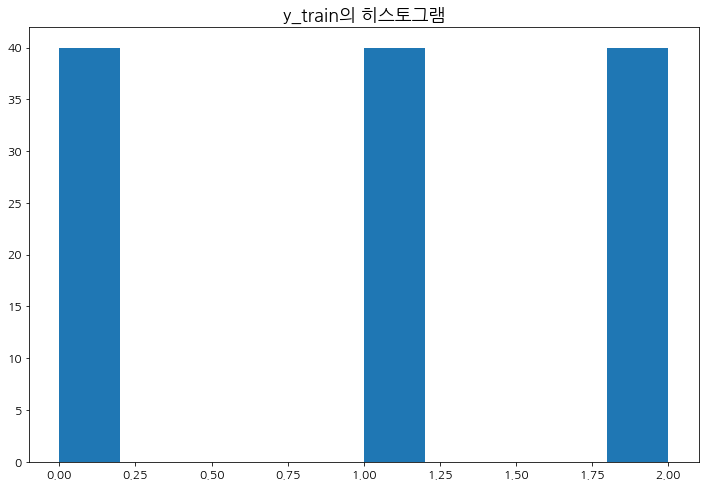

In [6]:
plt.figure(figsize=(12, 8))
plt.hist(y_train)
plt.title("y_train의 히스토그램", fontsize=18)
plt.show()

특성을 표준화합니다.

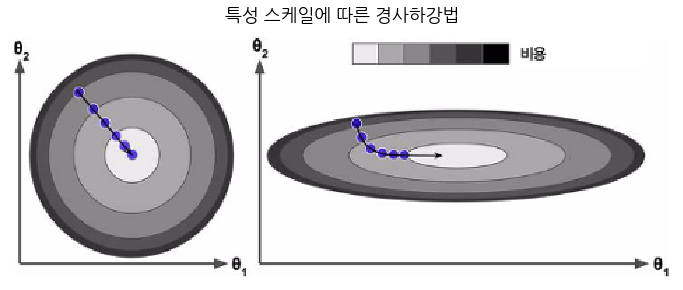

In [7]:
plt.figure(figsize=(12, 8))
plt.title("특성 스케일에 따른 경사하강법", fontsize=18)
plot_external("./images/ch02/8.png")

* 왼쪽: 특성1과 특성2의 스케일이 같은 경우  
* 오른쪽: 특성1이 특성2보다 더 작은 경우

특성1이 특성2보다 더 작기 때문에 비용함수에 영향을 주기 위해서는 $\theta_{1}$이 더 크게 바뀌어야합니다. 그래서 $\theta_{1}$축을 따라서 길쭉한 모양이 되게 됩니다.  

그림에서 볼 수 있듯이 왼쪽의 경사 하강법이 최솟값으로 더 빠르게 진행되지만 오른쪽 같은경우는 평평한 지역을 만나기 때문에 최솟값에 도달하는데 더 오래 시간이 걸릴 것으로 예상할 수 있습니다.    

모델이 가진 파라미터가 많을수록 공간의 차원은 커지고 검색은 어려워지며 시간은 오래 걸리게 됩니다.

넓은 백사장(차원이 매우 큼)에서 바늘을 찾는 것보다 작은 바구니(차원이 작음)에서 바늘을 찾는 것이 더 쉽습니다. 그러나 선형회귀는 비용함수가 볼록 함수이기 때문에 아무리 넓거나 아무리 작아도 그릇의 맨 아래에 바늘이 있을 것이므로 탐색도 빠르고 속도도 매우 빠릅니다.  

따라서 대부분의 알고리즘은 성능향상을 위해 특성 스케일 조정을 하는 것이 좋습니다.

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 2.2 Training a perceptron via scikit-learn

In [9]:
from sklearn.linear_model import Perceptron
# tol = 최적화를 위한 중지 기준
# eta0 = 학습률 eta
ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
y_pred = ppn.predict(X_test_std)
print("잘못 분류된 샘플 수: {:d}".format((y_test != y_pred).sum()))

잘못 분류된 샘플 수: 2


In [11]:
from sklearn.metrics import accuracy_score
print("정확도: {:.3f}".format(accuracy_score(y_test, y_pred)))

정확도: 0.933


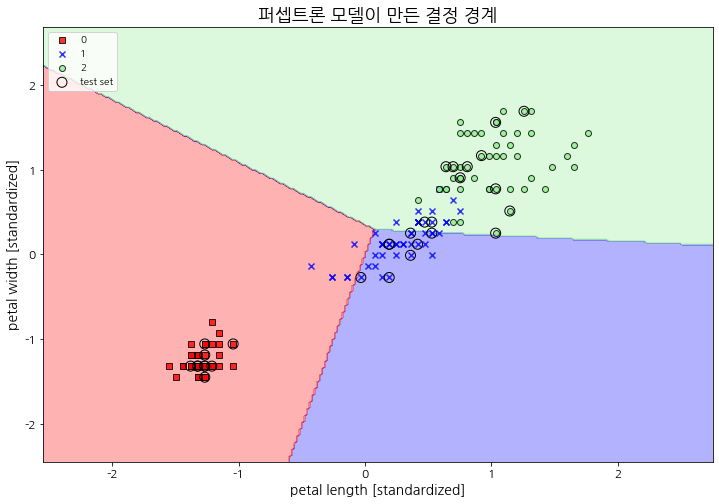

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(12, 8))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(120, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title("퍼셉트론 모델이 만든 결정 경계", fontsize=18)
plt.show()

## 2.3 Modeling class probabilities via logistic regression

퍼셉트론은 머신 러닝 분류 알고리즘에는 좋지만 **클래스가 선형적으로 구분되지 않을 때 수렴할 수 없다는 것입니다.** 에포크마다 샘플이 잘못 분류되기 때문에 가중치가 아무리 업데이트 되어도 모델의 성능은 절대로 좋아질 수 없습니다. 학습률을 바꾸고 에포크 횟수를 늘려서 모델의 성능은 좋아질 수 있지만 **근본적으로  절대 수렴하지 않습니다.** 이럴 때는 다른 분류 알고리즘을 이용하는 것이 현명한 방법입니다.

### 2.3.1 Logistic regression intuition and conditional probabilities

로지스틱 회귀는 구현하기가 쉽고 선형적으로 구분되는 클래스에 뛰어난 성능을 내는 분류 모델입니다. 실제 실무적으로도 가장 널리 사용되기도 합니다. 기본적으로 이진분류이지만 확장하여 다중분류에도 사용할 수있습니다.  

로지스틱 회귀 모델에는 odds ratio라는 개념이 있습니다. 이 것은 특정 이벤트가 발생할 롹률입니다. 즉 $P$가 특정 이벤트가 발생할 확률이라고 했을 때 odds ratio는 $\frac{p}{1-p}$로 나타낼 수 있습니다. 특정 이벤트(우리가 원하는)가 발생할 확률이므로 이는 **양성 샘플일 확률**이라고 할 수 있으며 y=1인 샘플이라고 할 수 있습니다. odds ratio에 로그함수를 취해 **logit함수**를 정의합니다.  

$$logit(P) = log\frac{P}{(1-p)}$$

특성의 가중치 합과 로그 odds 사이의 선형관계를 다음과 같이 표현할 수 있습니다.  
$$
\begin{split}
logit(P(y=1\, |\, x))&=w_{0}x_{0}+w_{1}x_{1}+\cdots+w_{m}x_{m} \\
                     &=\sum^{m}_{i=0}{w_{i}x_{i}}\\
                     &=\mathbf{w}^{T}\mathbf{x}
\end{split}
$$

여기서 $P(y=1\, |\, x)$는 특성 $x$가 주어졌을 때 이 샘플이 클래스 1에 속할 조건부 확률입니다.  

우리의 관심 대상은 logit함수를 뒤집어 어떤 샘플이 특성 클래스에 속할 확률을 구하는 것입니다. 따라서 이 함수를 로지스틱 시그모이드(logistic sigmoid), sigmoid함수라고 합니다.  

$$\phi(\mathbf{z}) = \frac{1}{1+e^{-z}}$$

$\mathbf{z}$는 가중치와 샘플 특성의 선형 결합입니다. 따라서  

$$
\begin{split}
z &= w^{T}x \\
  &=w_{0}x_{0}+w_{1}x_{1}+\cdots+w_{m}x_{m}
\end{split}
$$

코드로는 다음과 같이 구현합니다.

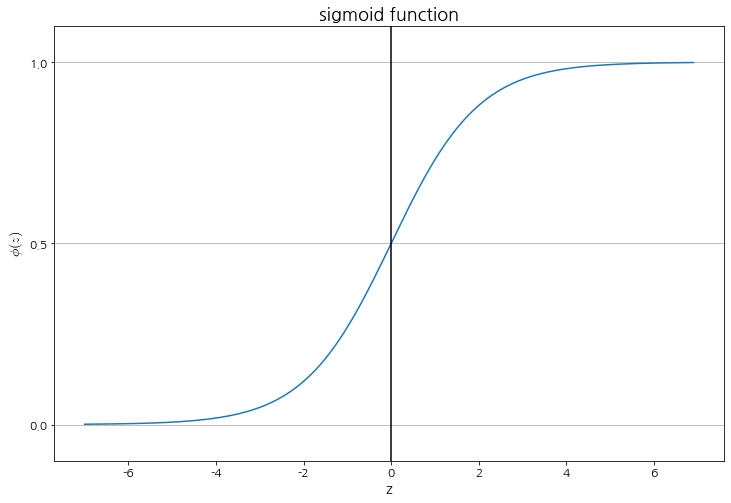

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.figure(figsize=(12, 8))
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.title("sigmoid function", fontsize=18)
plt.show()

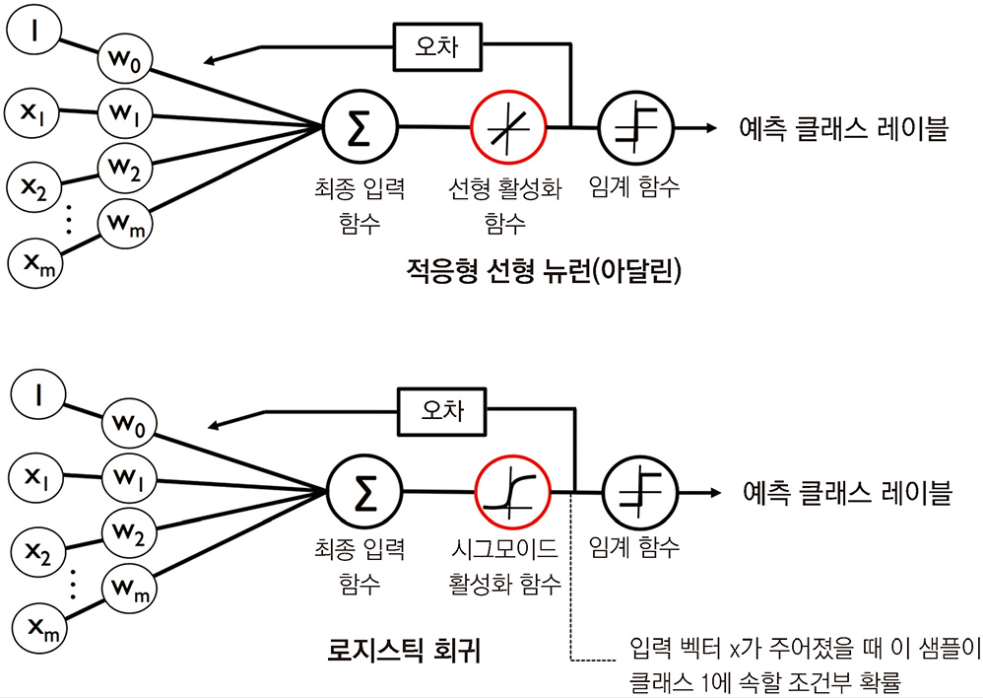

In [14]:
# 적응현 선형 뉴런 VS 로지스틱 회귀
Image(filename="./images/ch02/1.png", width=500)

### 2.3.1 Learning the weights of the logistic cost function

가중치 w와 특성 x에 대한 출력을 특정 샘플이 클래스 1에 속할 확률로 해석할 수 있습니다. 예측확률은 decision function을 이용하여 2진으로 분류할 수 있습니다.  

$$
\hat{y}=\begin{split}
\begin{cases} 
1 \quad&\phi(z)\ge0.5\\  
0 \quad &etc
\end{cases}
\end{split}
$$

### 2.3.2 Training a logistic regression model with scikit-learn

로지스틱 회귀의 비용 함수를 유도하기 위해서는 가능도 L을 정의하겠습니다. 각 샘플이 서로 독립적이라고 가정하며 공식은 다음과 같습니다.

\begin{split}
L({ w }) & =P({ y }\, |\, { x };\, { w }) \\  
& =\prod _{ i=1 }^{ n }{ P\left( y^{ (i) }\, |\, { x }^{ x^{ (i) } };{ w } \right)  }  \\  & =\prod _{ i=i }^{ n }{ {\left( \phi \left( z^{ {(i)} } \right)  \right)}^{y^{(i)}}\;{\left( 1-\phi \left( z^{ {(i)} } \right)  \right)}^{1-y^{(i)}}   }
\end{split}

위 식에 (자연)로그를 최대화하여 실전에서는 많이 사용합니다.

$$
\begin{split}
l(\mathbf{w}) &= logL(\mathbf{w}) \\
              &= \sum^{n}_{i=1}{\left[ y^{(i)}  log\left(\phi\left(z^{(i)} \right) \right)\,+\,
              \left(1-y^{(i)}\right)  log\left(1-\phi\left(z^{(i)} \right) \right) \right]}
\end{split}
$$

* 로그 함수를 적용하게 될 경우 가능도가 매우 작을 때 일어나는 언더플로를 방지할 수 있습니다.  
* 지수의 곱을 합으로 바꿀 수 가 있어 도함수를 구하기가 편합니다.  

샘플이 하나일 때 비용을 계산해보면 다음과 같습니다.

$$
\begin{split}
J(\phi(z),\, y;\, \mathbf{w} )=
\begin{cases}
-log(\phi(z))\quad   &y\,=\,1 \\
-log(1-\phi(z)) \quad  &y\,=\,0
\end{cases}
\end{split}
$$

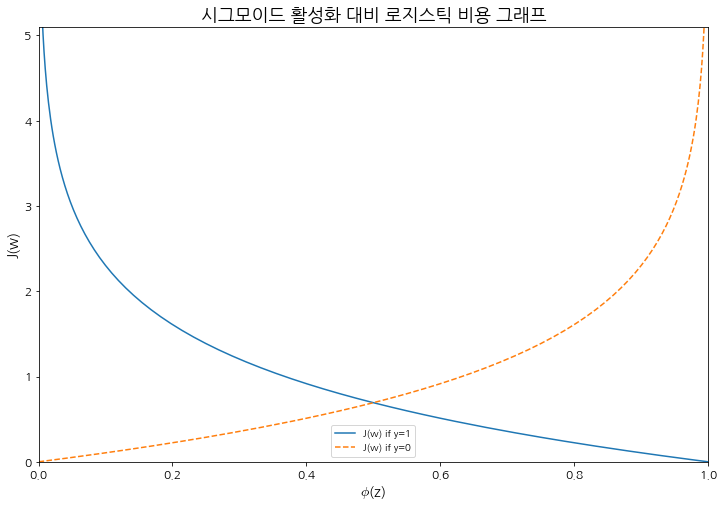

In [15]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.figure(figsize=(12, 8))
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]

plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.title("시그모이드 활성화 대비 로지스틱 비용 그래프", fontsize=18)
plt.show()

클래스 1에 속한 샘플을 정확히 예측하면 비용이 0에 가까워지는 것을 볼 수 있으며 클래스 0에 속한 샘플을 y=0으로 예측하게 되면 비용이 0에 가까워집니다. 예측이 잘못되면 비용이 무한대가 됩니다. 잘못된 예측에 점점 더 큰 비용을 부여하게 됩니다. 

### 2.3.2 Training a logistic regression model with scikit-learn

사이킷런에서 로지스틱구현은 매우 최적화가 되어 있고 다중 분류도 지원합니다.

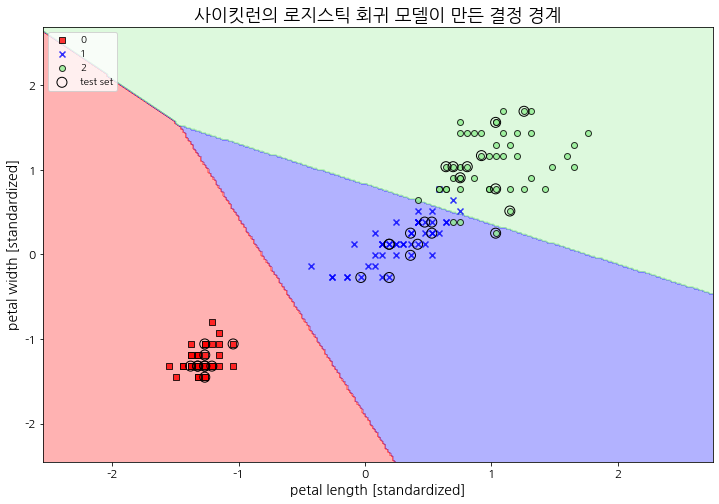

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plt.figure(figsize=(12, 8))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(120, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title("사이킷런의 로지스틱 회귀 모델이 만든 결정 경계", fontsize=18)
plt.show()

훈련 샘플이 어떤 클래스에 속할 확률은 predict_proba 메서드를 사용하여 계산합니다. 

In [17]:
lr.predict_proba(X_test_std)

array([[8.31357744e-01, 1.68642256e-01, 7.93694393e-14],
       [3.33410906e-06, 9.89662471e-01, 1.03341946e-02],
       [7.98038916e-01, 2.01961084e-01, 7.41698956e-12],
       [4.16718370e-09, 5.71200248e-01, 4.28799747e-01],
       [7.97433877e-01, 2.02566123e-01, 1.75021453e-13],
       [1.16936338e-05, 9.97714060e-01, 2.27424636e-03],
       [1.35069099e-10, 2.12466190e-01, 7.87533810e-01],
       [8.14715809e-01, 1.85284191e-01, 1.17932947e-13],
       [7.97433877e-01, 2.02566123e-01, 1.75021453e-13],
       [1.80456794e-03, 9.98176218e-01, 1.92144995e-05],
       [7.51315354e-13, 1.43408693e-01, 8.56591307e-01],
       [2.68274822e-05, 9.97228730e-01, 2.74444249e-03],
       [4.14168756e-07, 8.67867442e-01, 1.32132143e-01],
       [2.32640059e-11, 2.10980809e-01, 7.89019191e-01],
       [2.36591610e-04, 9.99686803e-01, 7.66056664e-05],
       [5.00972328e-10, 2.35025244e-01, 7.64974756e-01],
       [3.40889023e-10, 1.79128163e-01, 8.20871837e-01],
       [2.68666403e-06, 9.75951

첫 번째 행은 첫 번째 붓꽃의 클래스에 속할 확률입니다. 

이 것을 데이터프레임으로 표현해 보겠습니다.

In [18]:
class_prob = lr.predict_proba(X_test_std).argmax(axis=1)

In [19]:
iris_dict = dict(setosa=0, versicolor=1, virginica=2)
iris_dict_reverse = dict((value, key) for (key, value) in iris_dict.items())

In [20]:
y_pred = lr.predict(X_test_std)
print("잘못 분류된 샘플 수: {:d}".format((y_test != y_pred).sum()))

잘못 분류된 샘플 수: 1


In [21]:
import pandas as pd

In [22]:
test_columns = [iris_dict_reverse.get(i) for i in class_prob]
real_columns = [iris_dict_reverse.get(i) for i in y_test]
test_df = pd.DataFrame({"test_columns": test_columns,
                        "real_columns": real_columns})

In [23]:
test_df

,test_columns,real_columns
0,setosa,setosa
1,versicolor,versicolor
2,setosa,setosa
3,versicolor,virginica
4,setosa,setosa
5,versicolor,versicolor
6,virginica,virginica
7,setosa,setosa
8,setosa,setosa
9,versicolor,versicolor


정확도는 다음과 같습니다.

In [24]:
print("정확도: {:.3f}".format(lr.score(X_test_std, y_test)))

정확도: 0.967


### 2.3.3 Tackling overfitting via regularization

과대적합은 머신러닝에서 자주 발생하는 문제입니다. 훈련 데이터는 잘 맞추었지만 한 번도 본적이 없는 테스트데이터셋에서는 잘 맞지 않는 현상을 말합니다. 이 원인으로는 여러가지가 있지만 주로 모델 파라미터가 너무 많아서 주어진 데이터에서 복잡한 모델을 만들기 때문입니다. 이와 반대되는 개념을 가진 것이 과소적합입니다. 훈련 데이터에 있는 패턴을 감지할 정도로 충분히 모델이 복잡하지 않다는 것을 의미합니다. 이런 현상을 아래 그림으로 표현할 수 있습니다.

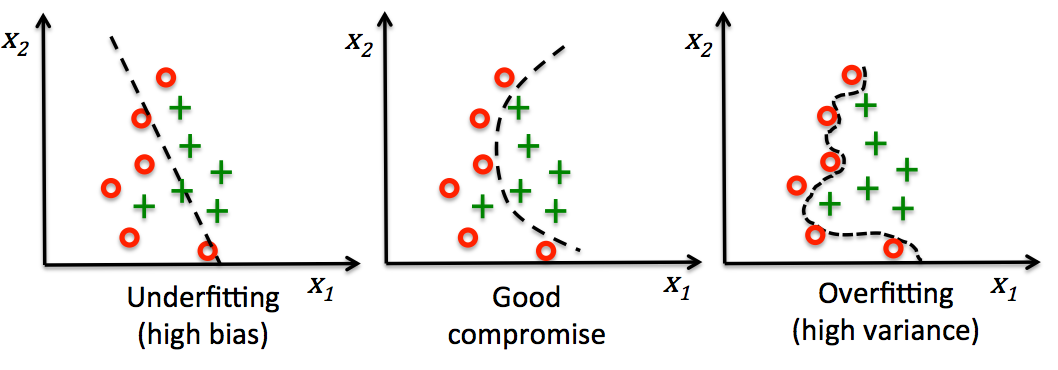

In [25]:
# 과대적합과 과소적합이 결정 경계에 미치는 영향
Image(filename="./images/ch02/2.png", width=700)

좋은 모델을 찾는 방법은 규제를 사용하여 모델의 복잡도를 조정하는 것입니다. 규제는 특성 간의 높은 상관관계를 다루거나 데이터에서 잡음을 제거하여 과대 적합을 방지할 수 있는 유용한 방법입니다. 규제는 과도한 파라미터 값을 제한하기 위해 추가적인 정보를 주입하는 개념입니다. 주로 사용하는 가중치 규제 형태는  

* $\ell_1$: 가중치를 0으로  
* $\ell_2$: 가중치 감쇠  

라고 부릅니다.  

규제 하이퍼파라미터 $\lambda$를 사용하여 가중치를 작게 유지하면서 훈련 데이터에 얼마나 잘 맞출지를 조정할 수 있습니다. $\lambda$값을 증가시키면 규제 강도가 높아집니다.  

scikit-learn의 LogisticRegression에서 C 파라미터는 $\lambda$의 역수입니다. 

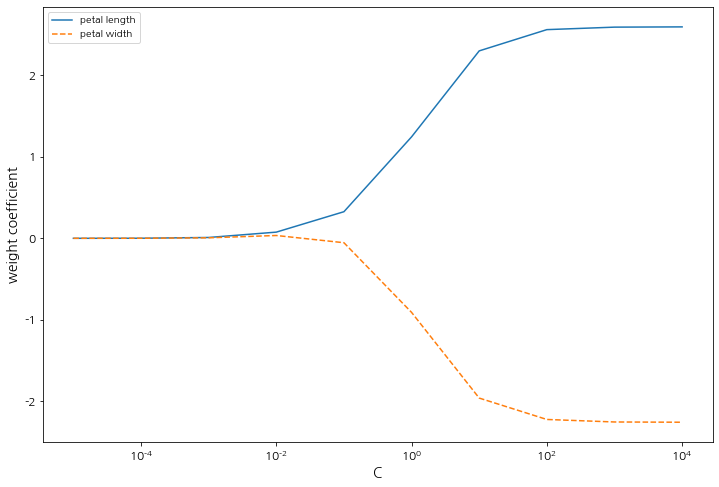

In [26]:
# mathtext.fontset : cm
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.figure(figsize=(12, 8))
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], 
         linestyle='--',label='petal width')

plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale(r'log')
plt.show()

C값이 감소하면 가중치 절대값이 줄어들고 규제 강도가 증가합니다.

## 2.4 Maximum margin classification with support vector machines

서포트 벡터 머신은 Margin을 최대화 하는 것입니다. Margin은 클래스를 구분하는 초평면(결정 경계)과 이 초퐁면에 가장 가까운 훈련 샘플 사이의 거리로 정의합니다. 이런 샘플을 서포트 벡터(support vectors)라고 합니다(아래 그림 참고).

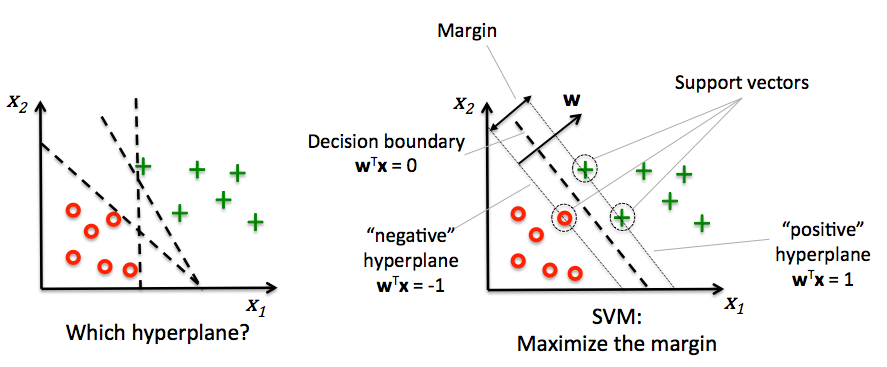

In [27]:
# 서포트 벡터 머신
Image(filename="./images/ch02/3.png", width=700)

### 2.4.1 Maximum margin intuition

큰 Margin의 결정 경계는 일반화 오차를 낮추는데 큰 도움이 되는 반면 작은 Margin은 과대적합되기 쉽습니다. 결정 경계와 나란히 놓인 양성 샘플쪽의 초평면과 음성 샘플 쪽의 초평면은 다음과 같이 쓸 수 있습니다.

$$
\begin{cases} w_{0}+\mathbf{w}^{T}\mathbf{x_{pos}} =1\quad  \;\;\,(1) \\ 
w_{0}+\mathbf{w}^{T}\mathbf{x_{neg}} =-1\quad  (2) \end{cases}
$$

위의 두 식을 삐면 (1) - (2)는 다음과 같습니다.

$$
\mathbf{w}^{T}(\mathbf{x_{pos}}-\mathbf{x_{neg}})=2
$$

위 식은 다음과 같은 벡터 $\mathbf{w}$의 길이로 정규화 할 수 있습니다.
$$
\|\mathbf{w}\|=\sqrt{\sum^{m}_{j=1}w^{2}_{j}}
$$

결과 식은 다음과 같습니다.

$$
\frac{\mathbf{w^{T}} \left(\mathbf{x_{pos}-\;\mathbf{ x_{neg}}} \right)}{\|\mathbf{w}\|} = \frac{2}{\|\mathbf{w}\|}
$$
이 식의 좌변은 두 초평면 사이의 거리로 해석할 수 있고 이 것을 margin이라고 합니다.  

SVM의 목적 함수는 $\frac{2}{\|\mathbf{w}\|}$를 최대화 하는 것입니다.

### 2.4.2 Dealing with the nonlinearly separable case using slack variables

1995년 블라드미르 바프닉이 소개한 슬랙 변수 $\varepsilon$는 선형적으로 구분되지 않는 데이터에 선형 제약 조건을 완화할 필요가 있기 때문에 도입되었습니다. 이를 통해 적절히 비용을 손해 보면서 분류 오차가 있는 상황에서 최적화 알고리즘이 수렴합니다. 이를 소프트 마진 분류 라고 합니다.

이 때 최소화할 새로운 목적 함수는 다음과 같습니다.

$$
\frac{1}{2}\mathbf{\|w\|}^{2} + C\left(\sum_{i} {\xi^{(i)}}\right)
$$

변수 C를 통해 분류 오차에 대한 비용을 조정할 수 있습니다. C값이 크면 오차에 대한 비용이 커지고, C 값이 작으면 오차에 덜 엄격해집니다. 매개변수 C를 사용하여 마진 폭을 제어할 수 있으며 아래 그림과 같이 편향-분산의 트레이드오프를 조정합니다.

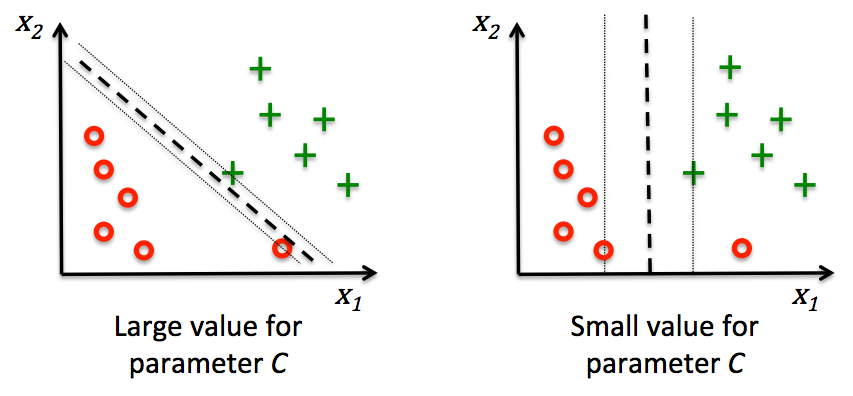

In [28]:
# C값에 따라 달라지는 SVM의 결정 경계와 마진
Image(filename="./images/ch02/4.png", width=700)

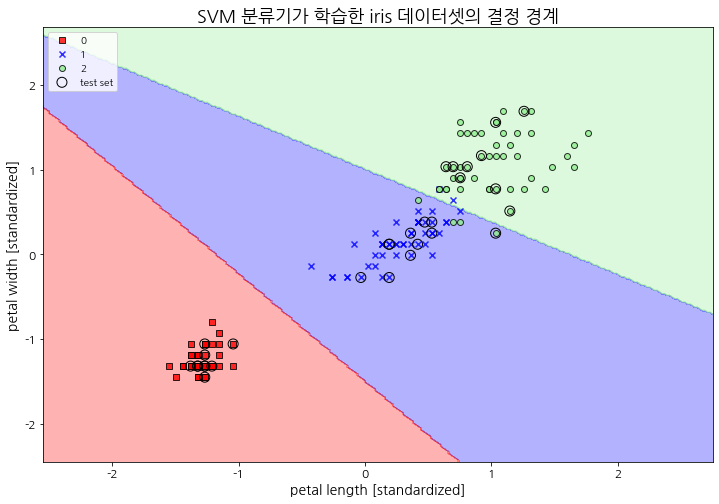

In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(12, 8))

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(120, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title("SVM 분류기가 학습한 iris 데이터셋의 결정 경계", fontsize=18)
plt.show()

## 2.5 Solving nonlinear problems using a kernel SVM

SVM이 인기가 많은 여러 가지 이유 중 하나는 비선형 문제를 풀기 위해 ***커널 방법***을 사용할 수 있기 때문입니다.

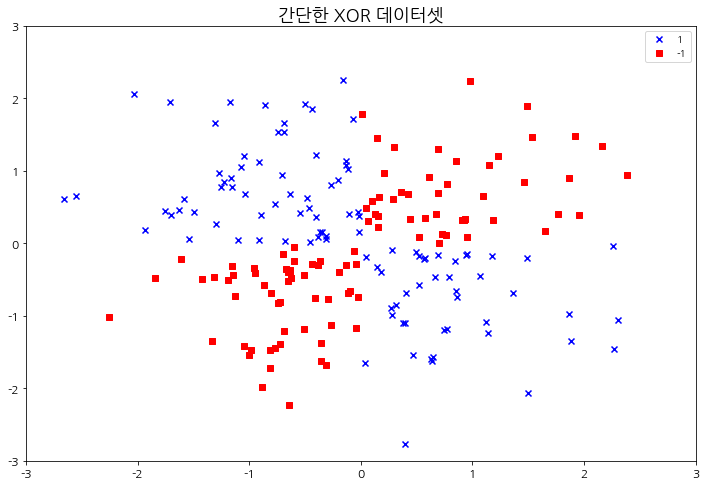

In [30]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.figure(figsize=(12, 8))
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.title("간단한 XOR 데이터셋", fontsize=18)
plt.show()

확실히 이 데이터는 양성 클래스와 음성 클래스를 선형 초평면으로 구분할 수는 없습니다. 이렇게 선형적으로 구분되지 않는 데이터를 매핑 함수 $\phi$를 사용하여 원본 특성의 비선형 조합을 선형적으로 구분되는 고차원 공간에 투영하는 것입니다.

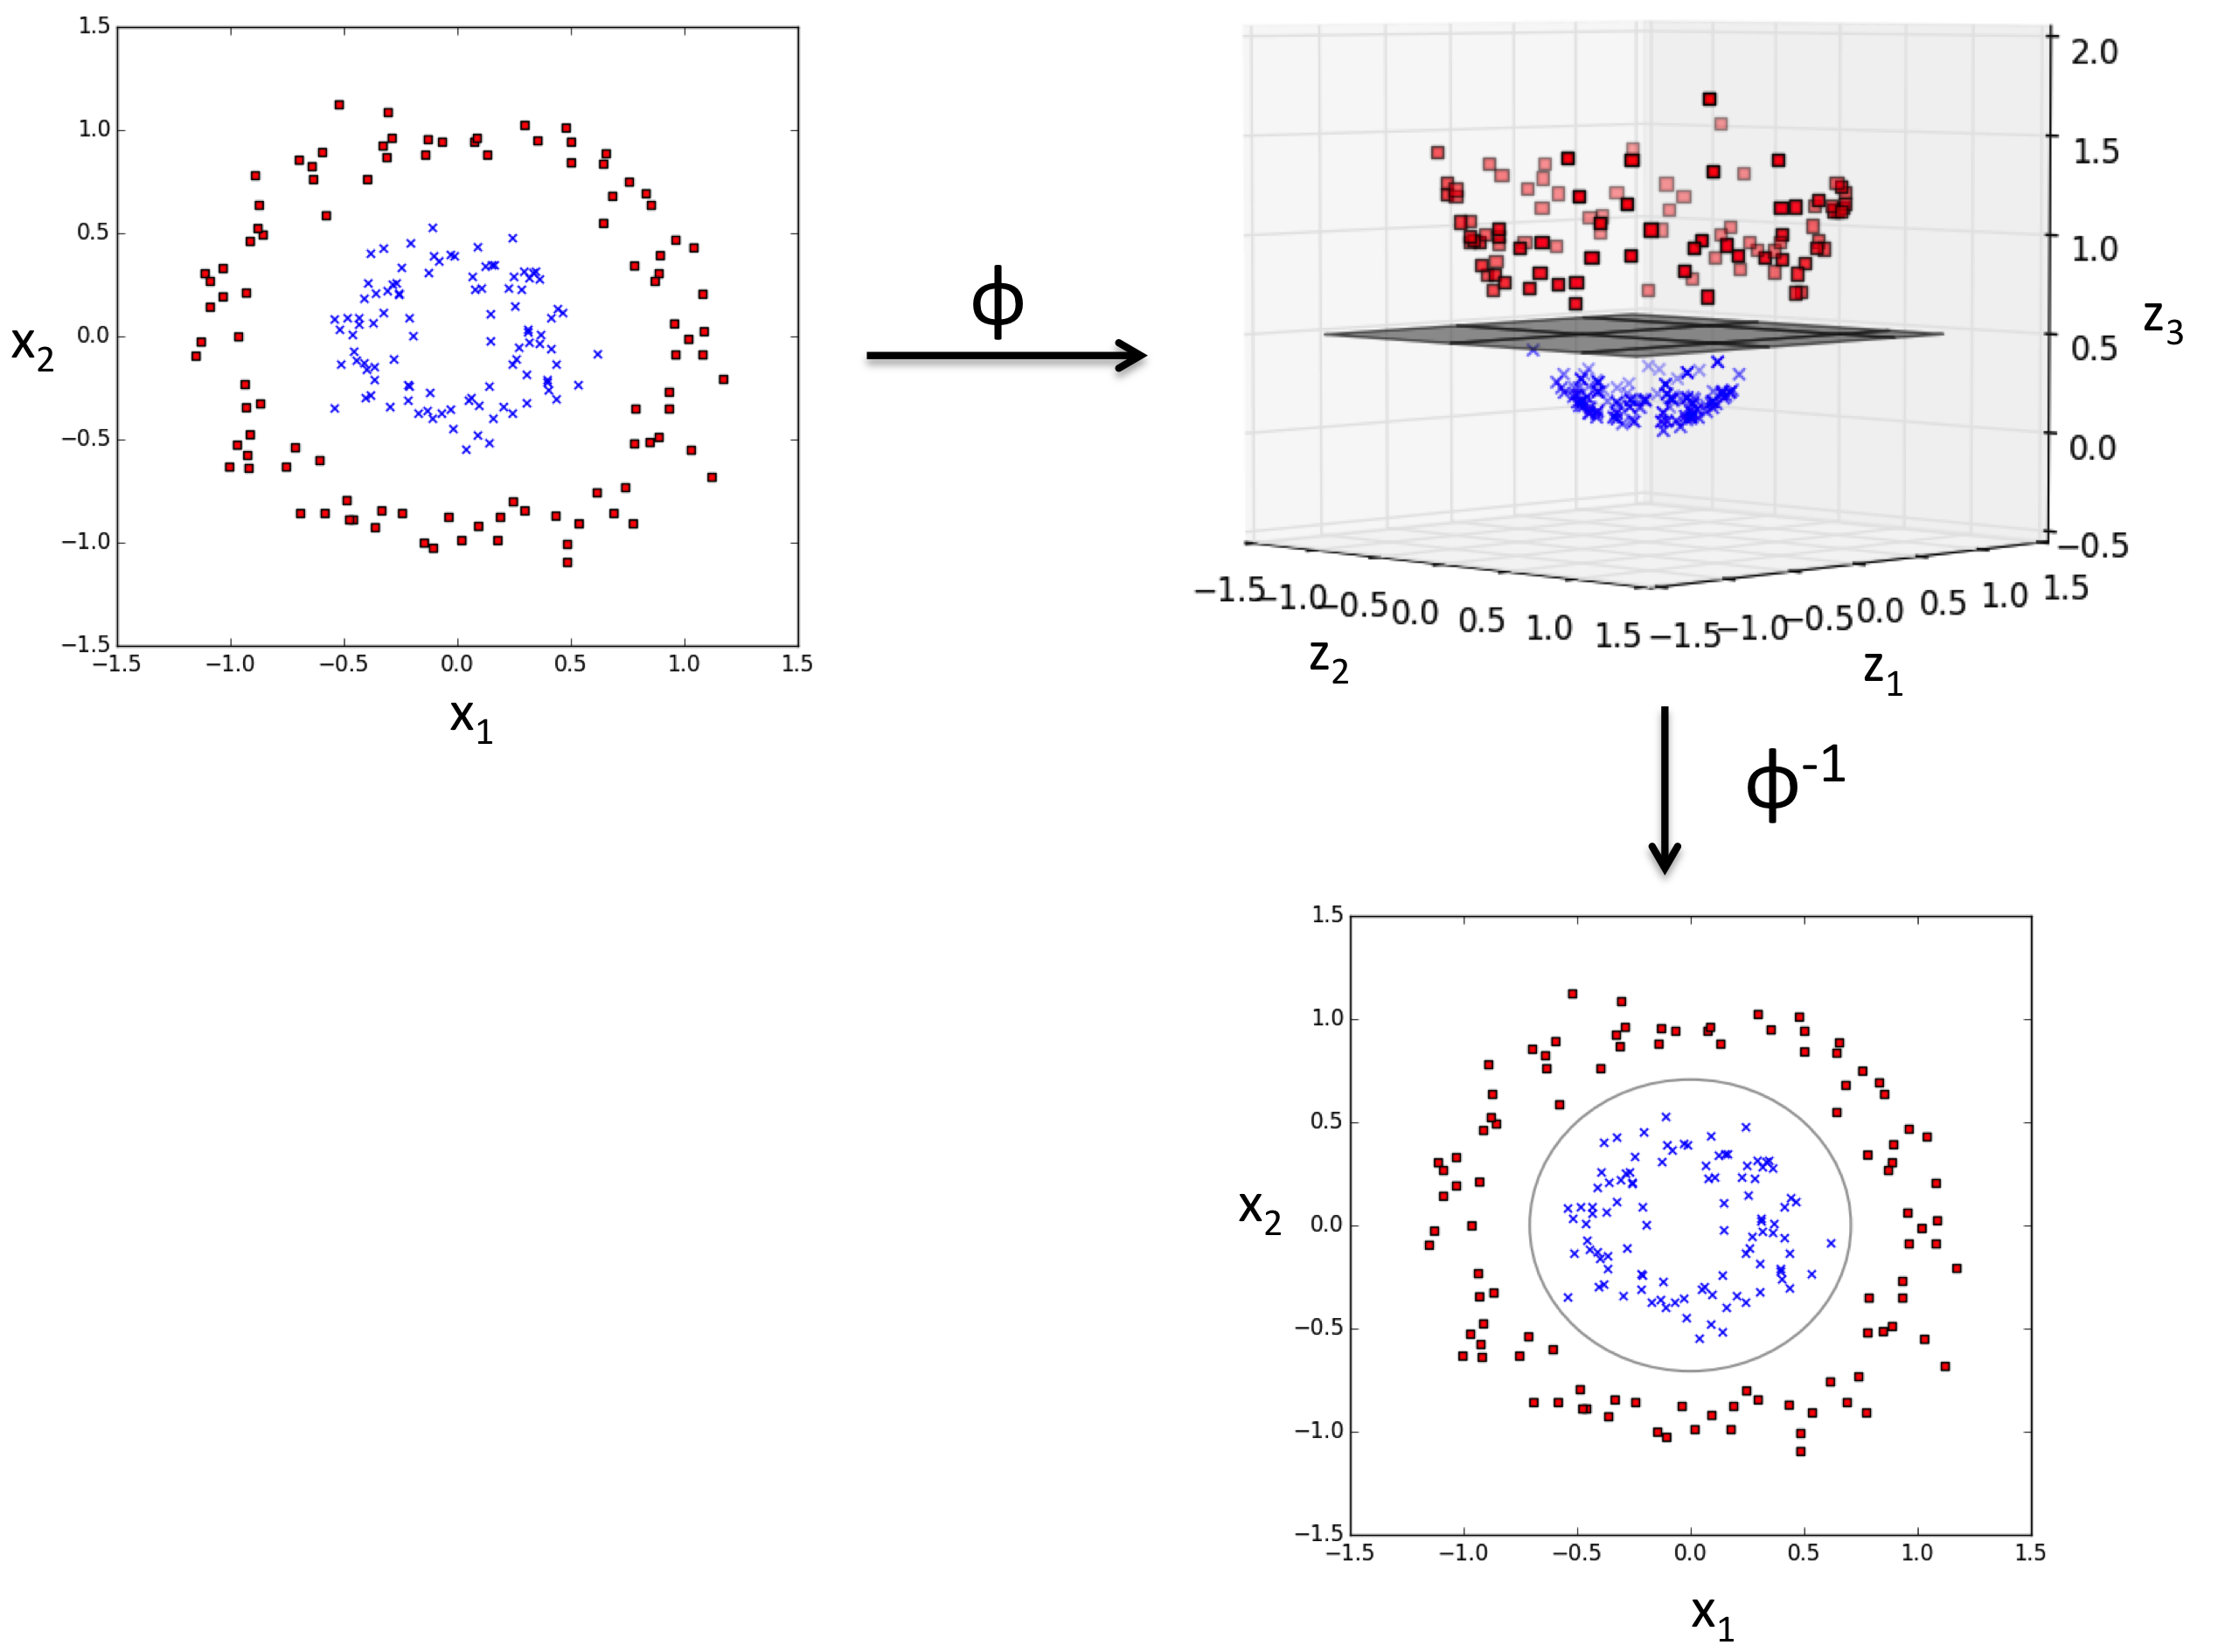

In [31]:
# 고차원 공간에서 찾은 결정 경계의 예
Image(filename="./images/ch02/5.png", width=700)

### 2.5.1 Using the kernel trick to find separating hyperplanes in higher dimensional space

SVM으로 비선형 문제를 풀기 위해 매핑 함수 $\phi$를 사용하여 훈련 데이터를 고차원 특성 공간으로 변환합니다. 그 다음 이 새로운 특성 곤간에서 데이터를 분류하는 선형 SVM 모델을 훈련합니다. 동일한 매핑 함수 $\phi$를 사용하여 새로운 본 적 없는 데이터를 변환하고 선형 SVM 모델을 사용하여 분류할 수 있습니다.  

이런 매핑 방식의 문제점은 ***계산 비용이 비싸다는 것입니다.*** 고차원 데이터일수록 당연히 더욱 비싸집니다. 이런 비싼 비용함수를 빠르게 처리하기 위한 방법으로 나온 것이 ***커널 함수***입니다.  

가장 유용하기 사용되는 커널 중하나는 Radial Basis Function, RBF와 가우시안 커널 Gaussian kernel입니다.

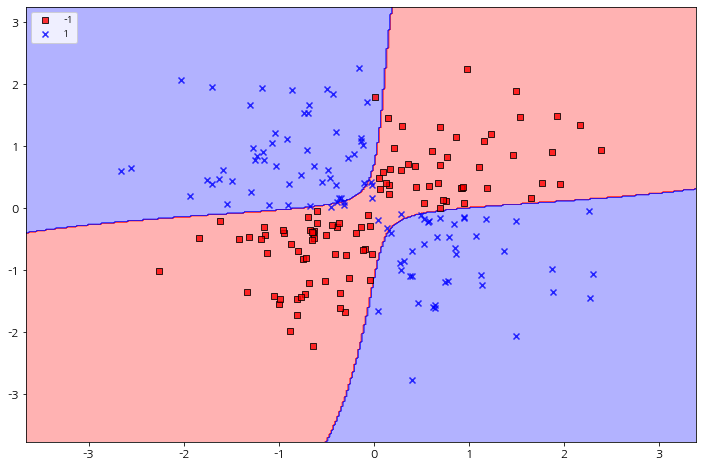

In [32]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plt.figure(figsize=(12, 8))
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.show()

$\gamma$값에 따른 서포트벡터의 영향이나 범위는 아래코드로 확인할 수 있습니다.

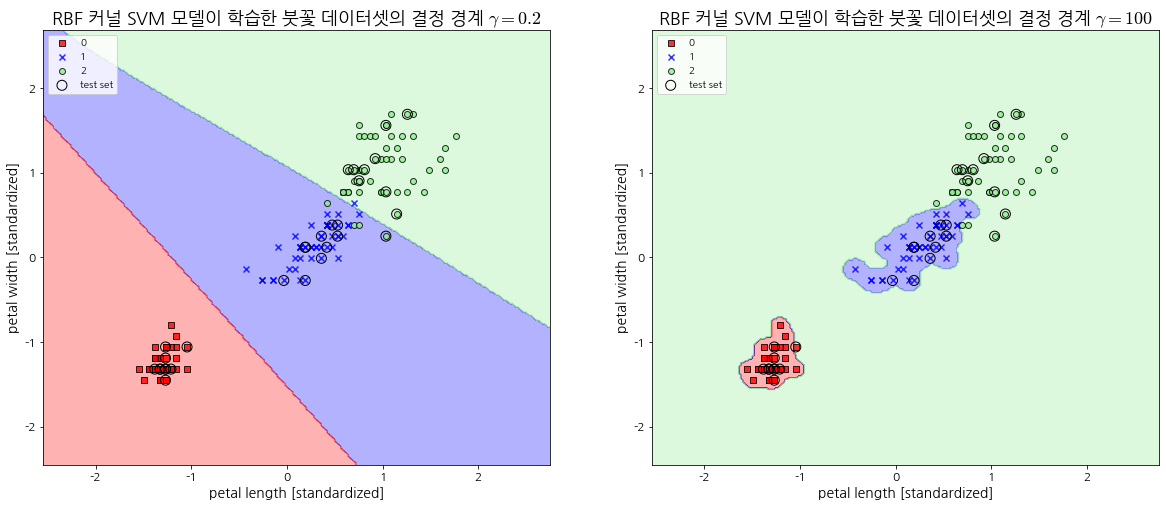

In [33]:
from sklearn.svm import SVC

svm_1 = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm_1.fit(X_train_std, y_train)

svm_2 = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm_2.fit(X_train_std, y_train)

plt.figure(figsize=(20, 8))
plt.subplot(121)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm_1, test_idx=range(120, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title(r"RBF 커널 SVM 모델이 학습한 붓꽃 데이터셋의 결정 경계 $\gamma=0.2$", fontsize=18)

plt.subplot(122)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm_2, test_idx=range(120, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title(r"RBF 커널 SVM 모델이 학습한 붓꽃 데이터셋의 결정 경계 $\gamma=100$", fontsize=18)
plt.show()

오른쪽 그림에서 알 수 있는 것은 훈련 데이터에는 잘 맞지만 테스트 데이터에서는 오차가 높을 것으로 보입니다. 이를 통해 $\gamma$ 매개변수가 과대적합을 조절하는 중요한 역할도 한다는 것을 알 수 있습니다.

## 2.6  Decision tree learning

결정 트리는 이름처럼 일련의 질문에 대한 결정을 통해 데이터를 분해하는 모델로 생각할 수 있습니다.

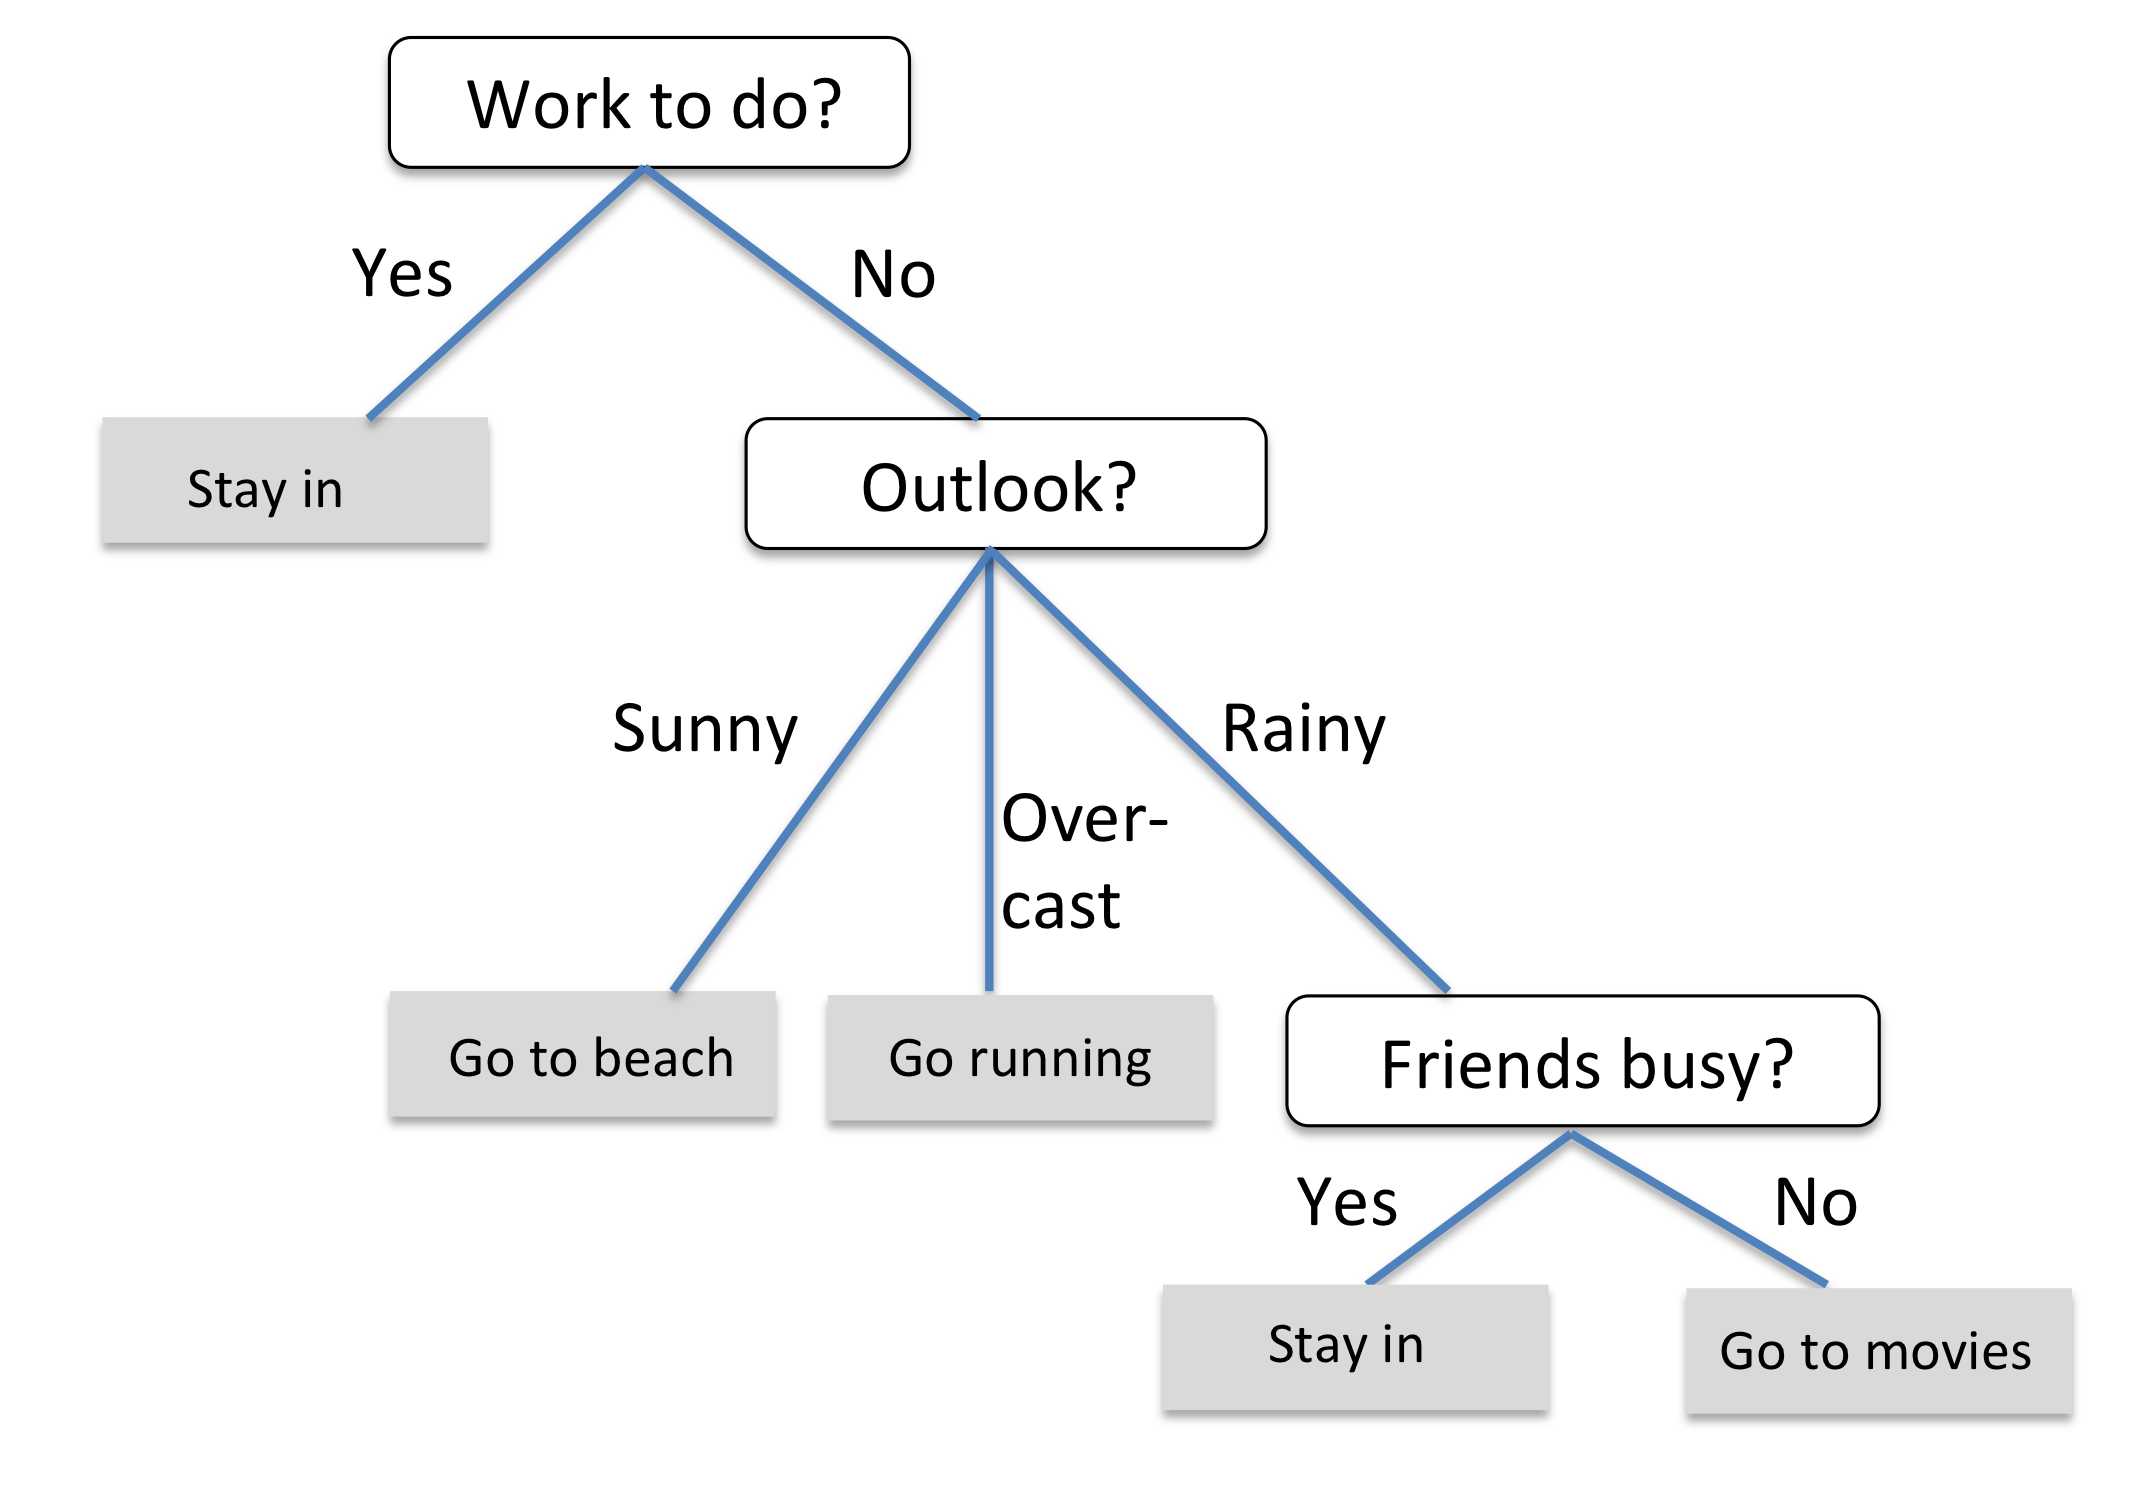

In [34]:
# 어떤 일을 할지 선택하기 위한 결정 트리
Image(filename="./images/ch02/6.png", width=700)

이 그림에서 트리의 **노드**는 질문이나 정답을 담은 네모 상자입니다(특히 마지막 노드는 ***리프노드***라고 합니다).

### 2.6.1 Maximizing information gain – getting the most bang for the buck

가장 정보가 많은 특성으로 노드를 나누기 위해 트리 알고리즘으로 최적화할 목적 함수를 정의합니다. 이진 결정 트리에 널리 사용되는 세개의 분순도 지표는 다음과 같습니다.  

* 지니 불순도(Gini impurity): 잘못 분류된 확률을 최소화하기 위한 기준, 클래스가 완벽하게 섞여있을 때 최대가 됨  
* 엔트로피(entropy): 클래스 분포가 균등할 때 엔트로피는 최대가 됨
* 분류 오차(classification error)

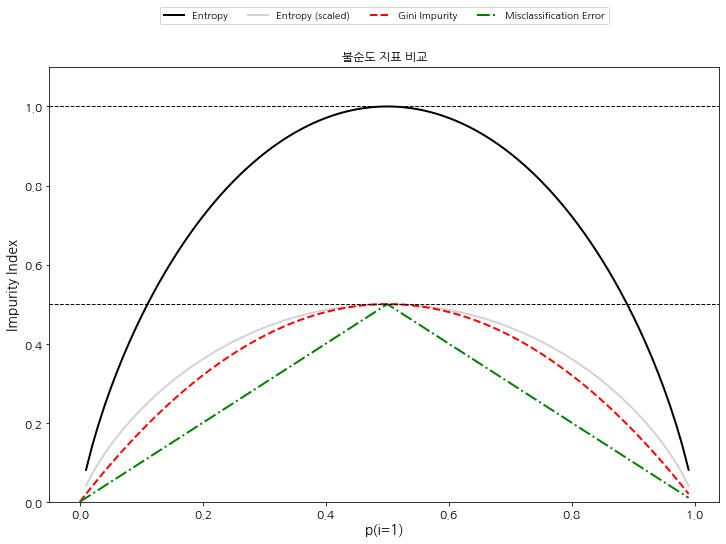

In [35]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

plt.figure(figsize=(12, 8))
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=4, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.title("불순도 지표 비교")
plt.show()

### 2.6.2 Building a decision tree

일반적으로 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대 적합이 됩니다. 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다는 의미입니다. 즉 훈련 세트의 모든 데이터 포인트는 정확한 클래스의 리프 노드에 있습니다. 과대적합을 막는 전략은 크게 2가지 입니다.  
* 사전 가지치기: 트리생성을 일찍 중단  
* 사후 가지치기: 트리생성을 완료한 후 일정 시점에서 가지를 잘라냄


결정 트리는 특성 공간을 사각 격자로 나누기 때문에 복잡한 결정 경계를 만들 수 있습니다. 결정 트리가 깊어질 수록 결정 경계가 복잡해지고 과대적합되기 쉽기 때문입니다. 

유방암 데이터셋을 이용하여 사전 가지치기의 효과를 확인해보겠습니다.

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [37]:
cancer = load_breast_cancer()

In [38]:
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

sc = StandardScaler()
sc.fit(cancer_X_train)

cancer_X_train_std = sc.transform(cancer_X_train)
cancer_X_test_std = sc.transform(cancer_X_test)

In [39]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(cancer_X_train_std, cancer_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [40]:
print("훈련 세트 정확도: {:.3f}".format(tree.score(cancer_X_train_std, cancer_y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(cancer_X_test_std, cancer_y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


예상대로 모든 리프 노드가 순수 노드 이므로 훈련 세트의 정확도는 100% 입니다. 결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있습니다. 그래서 사전 가지치기를 트리에 적용해서 훈련 데이터에 완전히 학습되는 것을 멈추게 할 수 있습니다. 이는 훈련 세트의 정확도를 떨어트리지만 테스트 세트의 성능은 개선시킵니다.

In [41]:
tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(cancer_X_train_std, cancer_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [42]:
print("훈련 세트 정확도: {:.3f}".format(tree.score(cancer_X_train_std, cancer_y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(cancer_X_test_std, cancer_y_test)))

훈련 세트 정확도: 0.977
테스트 세트 정확도: 0.944


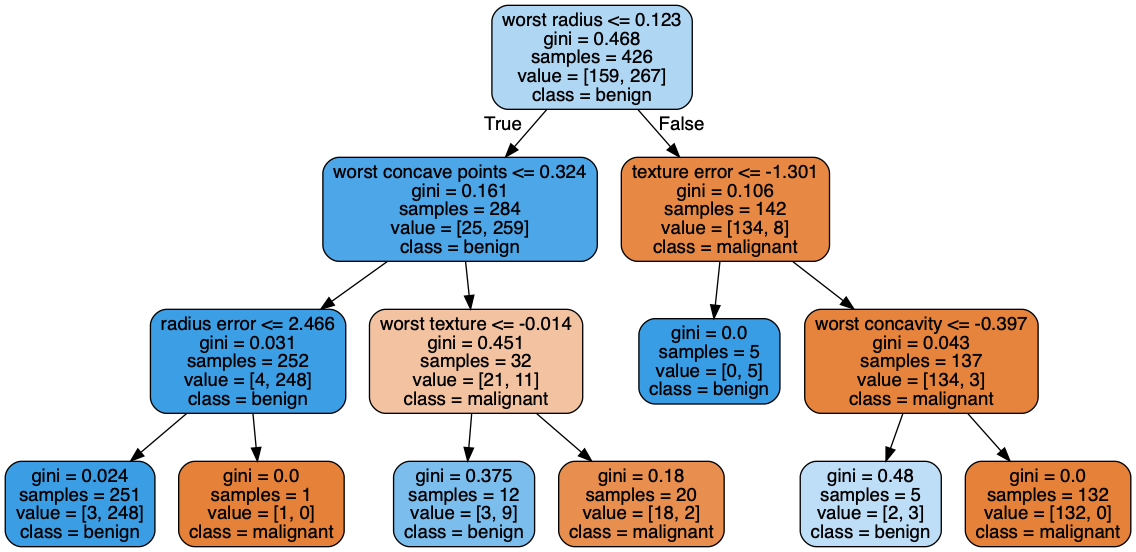

In [43]:
from IPython.display import Image
from IPython.display import display
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(
        tree, 
        out_file=None,
        feature_names=cancer.feature_names,  
        class_names=cancer.target_names,  
        filled=True,
        rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

트리의 특성 중요도

In [44]:
print("특성 중요도: \n{}".format(tree.feature_importances_))

특성 중요도: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01063382 0.0504697
 0.         0.         0.         0.         0.         0.
 0.         0.         0.75793681 0.03465357 0.         0.
 0.         0.         0.01896644 0.12733965 0.         0.        ]


위 결과를 시각화해보겠습니다.

In [45]:
def plot_feature_importances_cancer(model):
    n_features = len(model.feature_importances_)
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    plt.show()

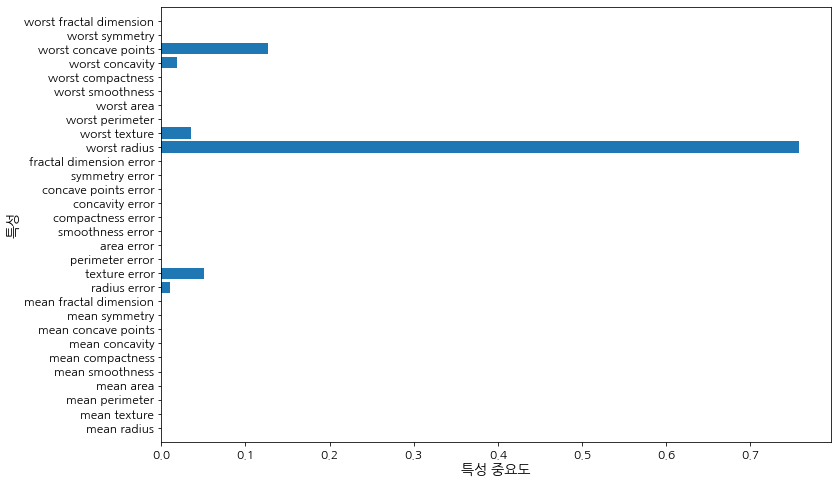

In [46]:
plt.figure(figsize=(12, 8))
plot_feature_importances_cancer(tree)

첫 번째 노드에서 사용한 특성("worst radius")이 가장 중요한 특성으로 나타납니다. 이 그래프는 첫 번째 노드에서 두 클래스를 꽤 잘 나누고 있습니다. 그러나 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아닙니다. 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서 일 수 있습니다.
선형 모델의 계수와는 달리, 특성 중요도 항상 양수이며 특성이 어떤 클래스를 지지하는지 알 수 없습니다. 즉 특성 중요도의 값은 "worst radius"가 중요하다고 알려주지만 높은 반지름이 양성을 의미하는지 악성을 의미하는지 알 수 없습니다. 사실 특성과 클래스 사이에는 간략하지 않은 관계가 있을 수 있습니다.

## 2.7 RandomForest

결정 트리의 주요 단점은 깊이를 결정하지 않으면 **훈련 데이터에 과대적합되는 경향이 있다는 것**입니다. 랜덤 포레스트는 이 문제를 회피할 수 있습니다. 랜덤 포레스트는 기본적으로 조금씩 다른 여러 결정 트리를 만들어 묶습니다. 랜덤 포레스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합한느 경향을 가진다는데 기초합니다. 예컨대 훈련 데이터에서 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들어 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있습니다. 이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어드는 것이 수학적으로 증명되었습니다.  

이런 전략을 구현하려면 기본적으로 결정 트리를 많이 만들어야 합니다. 각각의 트리는 타깃 예측을 잘해야 하고 다른트리와는 구별되어야 합니다. 랜덤 포레스트의 이름에서 알 수 있듯이 트리들이 달라지도록 트리 생성 시 무작위성을 주입합니다. 랜덤 포레스트에서 트리를 랜덤하게 만드는 방법은 두가지 입니다. 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택하는 방법과 분할 테스트에서 특성을 무작위로 선택하는 방법입니다. 

### 2.7.1 랜덤 포레스트 구축

랜덤 포레스트 모델을 만들려면 생성할 트리의 갯수를 정해야 합니다(n_estimators 매개변수). 이 트리들은 완전히 독립적으로 만들어져야 하므로 알고리즘은 각 트리가 고유하게 만들어지도록 무작위한 선택을 합니다. 트리를 만들기 위해 먼저 데이터의 **부트스트랩 샘플**을 생성합니다. 다시 말해 n_samples개의 데이터 포인트 중에서 무작위로 n_samples 횟수만큼 반복 추출합니다(한 샘플이 여러번 중복 추출될 수 있습니다).  
예를 들어 100개의 샘플 중 어떤 샘플 하나가 선택되지 않을 확률은 $\frac{99}{100}$입니다. 뽑은 샘플을 제외하지 않고 100번 반복할 때 한번도 선택되지 않을 확률은 ${\left(\frac{99}{100} \right)}^{100}=0.366$ 입니다. 따라서 어떤 데이터 포인트는 약 1/3확률로 누락될 수도 있고 어떤 데이터 포인트는 중복되어 들어 있을 수도 있습니다. 각 노드에서는 ***전체 특성을 대상으로 트리를 만드는 것이 아니고 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 트리를 만듭니다***. 몇 개의 특성을 고를지는 `max_features` 매개변수로 조정할 수 있습니다. 후보 특성을 고르는 것은 매 노드마다 반복되므로 트리의 각 노드는 다른 후보특성들을 사용하여 트리를 만듭니다. **부트스트랩 샘플링**은 랜덤 포레스트의 트리가 조금씩 다른 데이터셋을 이용해 만들어지도록 합니다. 또 각 노드에서 특성의 일부만 사용하기 때문에 트리의 각 분기느 각기 다른 특성 부분집합을 사용합니다. 이 두 매커니즘이 합쳐져서 랜덤 포레스트의 모든 트리가 서로 달라지도록 만듭니다.  

이 방식에서 핵심 매개변수는 **max_features**입니다. max_features를 **전체 특성의 수**로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 **무작위성**이 들어가지 않습니다(하지만 부트스트랩 샘플링으로 인한 무작위성은 그대로 입니다). max_features=1로 설정하면 무작위로 선택한 특성의 임계값을 찾기만 하면 됩니다. 결국 max_features값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷(같은 특성이 겹치는 경우가 많아지므로)해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰질 것입니다. max_features를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 기이가 깊어지게 됩니다.  

랜덤 포레스트로 예측을 할 때는 먼저 알고리즘이 모델에 있는 모든 트리의 예측을 만듭니다. 회귀의 경우에는 이 예측들을 평균하여 최종 예측을 만듭니다. 분류의 경우는 약한 투표전략을 사용합니다. 즉 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측을 합니다. 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 되빈다.

## 2.7.2 랜덤 포레스트 분석

two_moon 데이터셋을 가지고 트리 5개로 구성된 랜덤 포레스트 모델을 만들어 보겠습니다.

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [52]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    random_state=42)

In [54]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

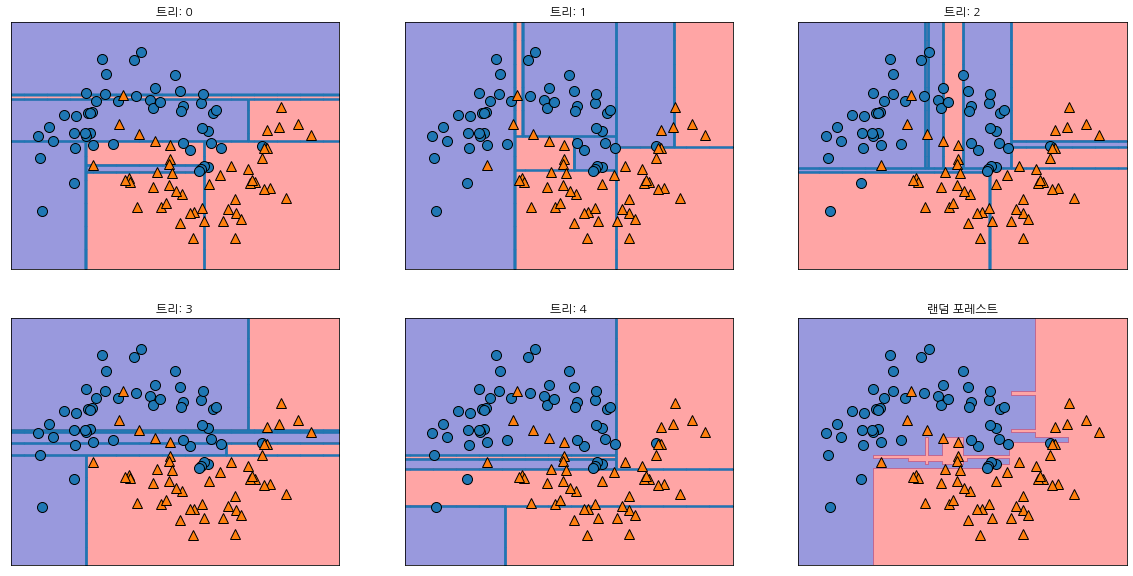

In [55]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리: {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)    
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

5개의 트리가 만든 결정 경계는 매우 다릅니다. 부트스트랩 샘플링 때문에 한쪽 트리에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어 각 트리는 불안전합니다. 실전에서는 매우 많은 트리를 사용하기 때문에 더 부드러운 경계가 만들어집니다. 다른 예로 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트를 적용해보겠습니다.

In [56]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [57]:
cancer = load_breast_cancer()

In [58]:
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

sc = StandardScaler()
sc.fit(cancer_X_train)

cancer_X_train_std = sc.transform(cancer_X_train)
cancer_X_test_std = sc.transform(cancer_X_test)

In [59]:
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(cancer_X_train_std, cancer_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
print("훈련 세트 정확도: {:.3f}".format(forest.score(cancer_X_train_std, cancer_y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(cancer_X_test_std, cancer_y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


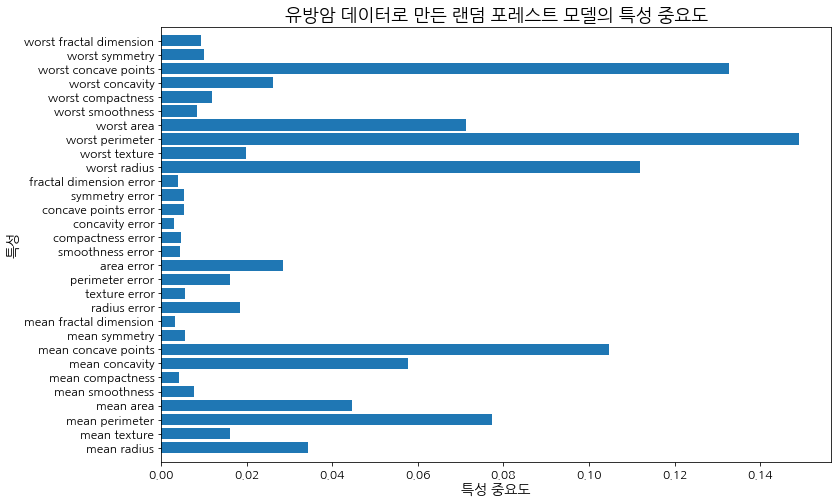

In [61]:
plt.figure(figsize=(12, 8))
plt.title("유방암 데이터로 만든 랜덤 포레스트 모델의 특성 중요도", fontsize=18)
plot_feature_importances_cancer(forest)

그림에서 알 수 있듯이 랜덤 포레스트는 단일 트리의 경우보다 훨씬 많은 특성이 0이상의 중요도 값을 갖습니다.

### 2.7.3 장단점과 매개변수

회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘입니다. 랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없습니다.  

기본적으로 랜덤 포레스트는 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있습니다. 대량의 데이터셋에서 랜덤 포레스트 모델을 만들 때 다소 기간이 걸릴 수있지만 멀티 코어 프로세서일 때는 사용할 코어 수를 지정할 수 있습니다.  

랜덤 포레스트는 이름에서 볼 수 있듯이 말 그대로 **랜덤**합니다. 그래서 다른 random_state를 지정하면 (또는 random_state를 지정하지 않으면) 전혀 다른 모델이 만들어집니다. 랜덤 포레스트의 트리가 많을수록 random_state 값의 변화에 따른 변동이 적습니다. 만약 같은 결과를 만들어야 한다면 random_state 값을 고정해야 합니다.  

랜덤 포레스트는 데이터의 차원이 높고 **희소한 데이터에는 잘 작동하지 않습니다.** 이런 데이터에는 **선형 모델**이 더 적합합니다. 랜덤 포레스트는 매우 큰 데이터셋에도 잘 작동하며 훈련은 여러 CPU 코어로 간단하게 병렬화할 수 있습니다. 하지만 랜덤 포레스트는 선형 모델보다 많은 메모리를 사용하며 훈련과 예측이 느립니다.  

중요 매개변수는 **n_estimators**, **max_features**이고 **max_depth** 같은 사전 가지치기 옵션이 있습니다. **n_estimator**는 클수록 좋습니다. 더 많은 트리를 평균하면 과대적합을 줄여 더 안정적인 모델을 만들기 때문입니다. 하지만 이로 인해 더 많은 트리는 더 많은 메모리와 긴 훈련 시간으로 이어집니다. 

**max_features**는 각 트리가 얼마나 무작위가 될지를 결정하며 작은 **max_features**는 과대적합을 줄여줍니다. 

## 2.8 Gradient Boosting Regression Tree

그래디언트 부스팅 회귀트리는 여러 개의 결정 트리를 묶어 모델을 만드는 앙상블 방법입니다. 랜덤 포레스트와는 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듭니다.  기본적으로 그래디언트 부스팅 회귀트리에는 무작위성이 없늗 대신에 사전 가지치기가 사용됩니다. 그래디언트 부스팅 트리는 보통 1~5정도의 깊이를 사용하므로 메모리를 적게 사용하고 예측도 빠릅니다.  

그래디언트 부스팅의 근본 아이디어는 **이런 얕은 트리를 많이 연결하는 것**입니다. 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될수록 성능이 좋아집니다.  

앙상블 방식에 있는 사전 가지치기나 트리 갯수 이외에도 그래디언트 부스팅에서 중요한 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인가 하는지 입니다. 이 것을 수행하는 매개변수는 `learning_rate`입니다. 학습률이 크면 트리는 보정을 가하게 하기 때문에 복잡한 모델을 만듭니다. n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 오차를 바로잡을 확률이 더 높아집니다.

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [63]:
cancer = load_breast_cancer()

In [64]:
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

sc = StandardScaler()
sc.fit(cancer_X_train)

cancer_X_train_std = sc.transform(cancer_X_train)
cancer_X_test_std = sc.transform(cancer_X_test)

In [65]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(cancer_X_train_std, cancer_y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [66]:
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(cancer_X_train_std, cancer_y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(cancer_X_test_std, cancer_y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


훈련 세트의 정확도가 100%이므로 과대적합이 되었습니다. 과대 적합을 막기 위해서 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있습니다.

In [67]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(cancer_X_train_std, cancer_y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [68]:
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(cancer_X_train_std, cancer_y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(cancer_X_test_std, cancer_y_test)))

훈련 세트 정확도: 0.995
테스트 세트 정확도: 0.965


훈련 정확도가 감소되고 테스트세트 정확도가 상승했습니다.

다른 결정 트리 기반의 모델처럼 특성의 중요도를 시각화할 수 있습니다. 

In [69]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(cancer_X_train_std, cancer_y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

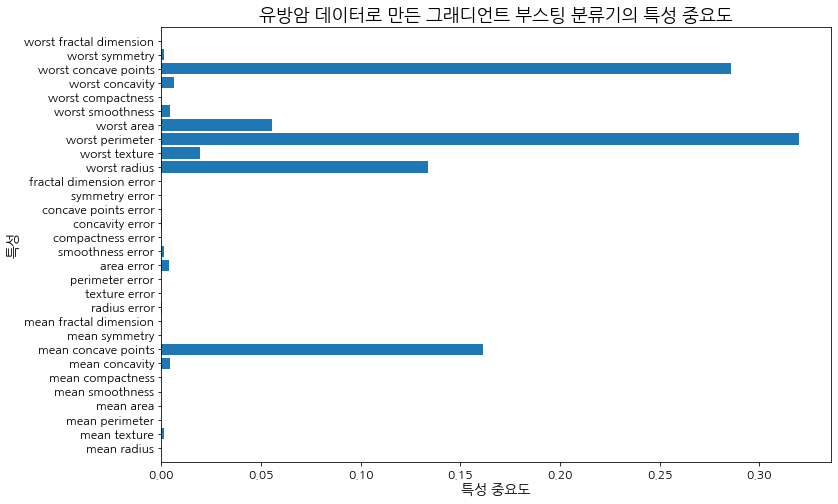

In [70]:
plt.figure(figsize=(12, 8))
plt.title("유방암 데이터로 만든 그래디언트 부스팅 분류기의 특성 중요도", fontsize=18)
plot_feature_importances_cancer(gbrt)

그래디언트 부스팅은 랜덤포레스트와는 달리 일부 특성을 완전히 무시하고 있습니다.  

비슷한 종류의 데이터에서 그래디언트 부스팅과 랜덤 포레스트 둘 다 작동합니다만, 보통 더 안정적인 랜덤 포레스트를 먼저 사용하는 것이 거의 낫습니다. 

### 2.8.1 장단점과 매개변수

가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련시간이 길다는 것입니다. 다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 동작합니다. 그리고 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않습니다.  

그래디언트 부스팅 트리 모델의 중요 매개변수는 트리의 갯수를 지정하는 `n_estimators`와 이전 트리의 오차를 보정하는 정도인 `learning_rate`입니다. 이 두 매개변수는 매우 깊게 연관되며 `learning_rate`를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야 합니다. `n_estimators`가 클수록 좋은 랜덤 포레스트와는 달리 그래디언트 부스팅에서 `n_estimatros`를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아집니다.  

중요한 또 다른 매개변수는 각 트리의 복잡도를 낮추는 `max_depth`(또는 `max_leaf_nodes`)입니다. 통상 그래디언트 부스팅 모델에서는 `max_depth`를 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않게 합니다.

## 2.9 K-nearest neighbors – a lazy learning algorithm

$k$-NN 알고리즘은 가장 간단한 머신러닝 알고리즘입니다. 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 "최근접 이웃"을 찾습니다.

### 2.9.1 최근접 이웃 분류

/Users/woohyeon/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/Users/woohyeon/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


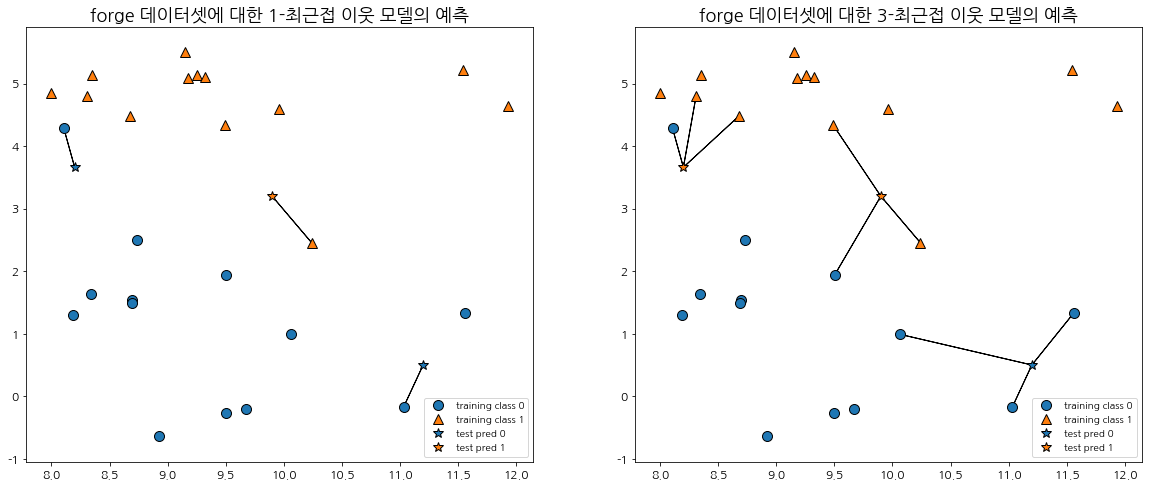

In [71]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title("forge 데이터셋에 대한 1-최근접 이웃 모델의 예측", fontsize=18)
mglearn.plots.plot_knn_classification(n_neighbors=1)

plt.subplot(122)
plt.title("forge 데이터셋에 대한 3-최근접 이웃 모델의 예측", fontsize=18)
mglearn.plots.plot_knn_classification(n_neighbors=3)

plt.show()

왼쪽 그림에 데이터 포인트 3개를 추가했습니다(별 모양으로 표시). 그리고 추가한 각 데이터에서 가장 가까운 훈련 데이터 1개를 연결했습니다. 즉 1-최근접 이웃 알고리즘의 예측은 **이 데이터 포인트의 레이블이 됩니다.**  

오른쪽 그림에서 별모양의 데이터 포인트에서 가장가까운 훈련 데이터 3개를 찾습니다. 그 다음 **가장 많은 클래스를 가진 레이블을 예측 레이블로 삼습니다.**

In [72]:
from sklearn.model_selection import train_test_split
from mglearn.datasets import make_forge
X, y = make_forge()

/Users/woohyeon/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [75]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [76]:
print("테스트 예측: {}".format(clf.predict(X_test)))

테스트 예측: [1 0 1 0 1 0 0]


모델 평가는 다음과 같이 진행합니다.

In [77]:
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.857


### 2.9.2 KNeighborsClassifier 분석

2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 그려볼 수 있습니다. 다음 코드로 확인할 수 있습니다.

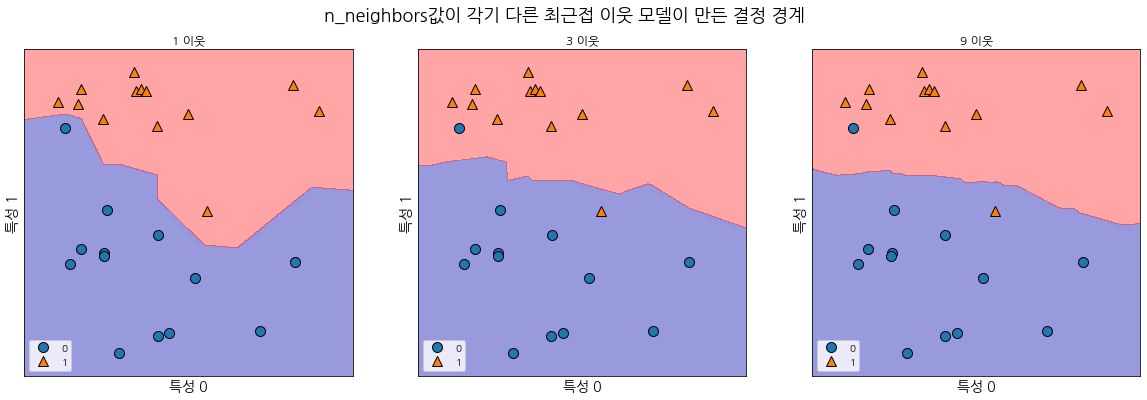

In [78]:
plt.figure(figsize=(20, 6)).suptitle("n_neighbors값이 각기 다른 최근접 이웃 모델이 만든 결정 경계", fontsize=18)
for n_neighbors, subplot in zip([1, 3, 9], ("131", "132", "133")):
    plt.subplot(subplot)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
    plt.title("{} 이웃".format(n_neighbors))
    plt.xlabel("특성 0")
    plt.ylabel("특성 1")
    plt.legend(loc=3)
plt.show()

왼쪽 그림을 보면 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있습니다. 이웃의 수를 늘릴수록 결정 경계는 부드러워지고 이는 단순한 모델을 의미합니다.

### 2.9.3 KNeighborsRegressor 

k-최근접 이웃 알고리즘은 회귀 분석에도 쓰입니다. wave 데이터에셋을 이용해서 이웃이 하나인 최근접 이웃을 사용해보겠습니다. x축에 3개의 테스트 데이터를 흐린 별 모양으로 표시했습니다. 최근접 이웃을 한 개만 이용할 때 예측은 그냥 가장 가까운 이웃의 타깃값이며 여러 개일 때는 이웃간 평균이 예측됩니다.

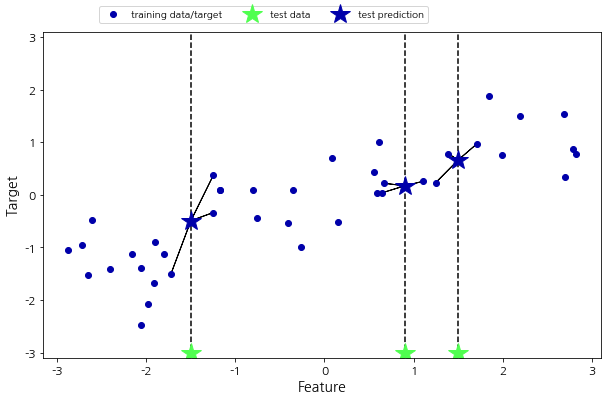

In [79]:
# wave 데이터셋에 대한 1-최근접 이웃 회귀 모델의 예측
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

In [80]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [81]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [83]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [84]:
print("테스트 세트 예측: \n{}".format(reg.predict(X_test)))

테스트 세트 예측: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


score 메서드를 사용해 모델을 평가할 수 있습니다. 회귀일 때는 $R^2$값을 반환합니다.

In [85]:
from IPython.display import display, Math

In [86]:
display(Math(r"테스트 세트 \, R^2: {:.2f}".format(reg.score(X_test, y_test))))

<IPython.core.display.Math object>

### 2.9.4 KNeighborsRegressor 분석

In [87]:
subplots = ("131", "132", "133")
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

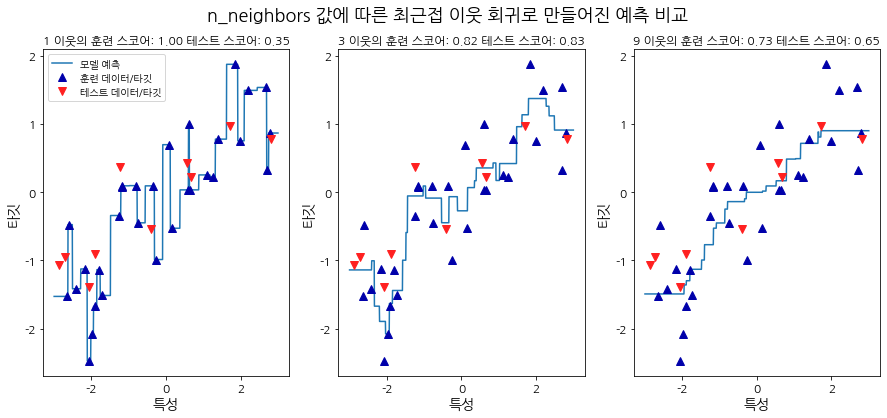

In [88]:
plt.figure(figsize=(15, 6)).suptitle("n_neighbors 값에 따른 최근접 이웃 회귀로 만들어진 예측 비교", fontsize=18)
for n_neighbors, subplot in zip([1, 3, 9], subplots):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    plt.subplot(subplot)
    plt.plot(line, reg.predict(line))
    plt.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    plt.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    plt.title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, 
                                                            reg.score(X_train, y_train),
                                                            reg.score(X_test, y_test)))
    plt.xlabel("특성")
    plt.ylabel("타깃")
    if subplot==subplots[0]:
        plt.legend(["모델 예측", 
                    "훈련 데이터/타깃",
                    "테스트 데이터/타깃"],
                   loc="best")
plt.show()        

이 그림에서 볼 수 있듯이 이웃을 하나만 사용할 때는 훈련 세트와 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나갑니다. 이는 매우 불안정한 예측을 만들어 냅니다. 이웃을 많이 사용하면 훈련 데이터에는 잘 안맞을 수 있지만 더 안정된 예측을 얻게 됩니다.